# Import Library

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Build Data Frame
## Import Data

In [2]:
df = yf.download("DELTA.BK", start="2020-11-01", end="2025-11-01")
df.to_csv("DELTA.csv")
df.head()

C:\Users\BOUY\AppData\Local\Temp\ipykernel_14132\354075081.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("DELTA.BK", start="2020-11-01", end="2025-11-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,DELTA.BK,DELTA.BK,DELTA.BK,DELTA.BK,DELTA.BK
Date,,,,,
2020-11-02,17.586483,17.586483,16.906342,17.294993,27644000
2020-11-03,17.392157,18.169461,17.392157,17.683646,29875000
2020-11-04,18.849600,19.286834,17.537900,17.537900,70905000
2020-11-05,19.335413,19.335413,18.752435,19.286832,40707000
2020-11-06,18.412367,19.286832,18.266621,19.286832,36999000


In [3]:
df.columns

MultiIndex([( 'Close', 'DELTA.BK'),
            (  'High', 'DELTA.BK'),
            (   'Low', 'DELTA.BK'),
            (  'Open', 'DELTA.BK'),
            ('Volume', 'DELTA.BK')],
           names=['Price', 'Ticker'])

# Set date

In [4]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']].dropna()

df.set_index('Date', inplace=True)
print(df.head())

Price           Close
Ticker       DELTA.BK
Date                 
2020-11-02  17.586483
2020-11-03  17.392157
2020-11-04  18.849600
2020-11-05  19.335413
2020-11-06  18.412367


# Split Data
80/20

In [5]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]
print(f"📊 Train Data: {len(train)} ({len(train)/len(df)*100:.1f}%)")
print(f"📈 Test Data: {len(test)} ({len(test)/len(df)*100:.1f}%)")

📊 Train Data: 968 (80.0%)
📈 Test Data: 242 (20.0%)


# Build Model

In [6]:
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test))

c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               DELTA.BK   No. Observations:                  968
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2387.362
Date:                จ., 03 พ.ย. 2025   AIC                           4786.724
Time:                        14:49:17   BIC                           4815.969
Sample:                             0   HQIC                          4797.857
                                - 968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0554      0.021     -2.663      0.008      -0.096      -0.015
ar.L2         -0.0888      0.021     -4.300      0.000      -0.129      -0.048
ar.L3         -0.0822      0.022     -3.745      0.0

c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Predict Model

c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\BOUY\AppData\Local\Temp\ipykernel_14132\288896261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted'] = pred.values


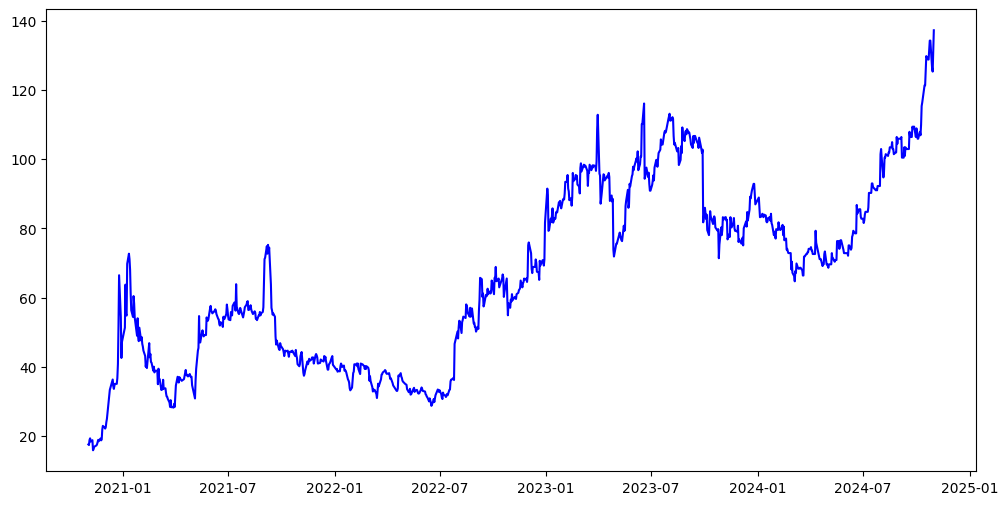

In [7]:
pred = model_fit.forecast(steps=len(test))
test['Predicted'] = pred.values
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label='Train', color='blue')

In [8]:
mae = mean_absolute_error(test['Close'], test['Predicted'])
rmse = np.sqrt(mean_squared_error(test['Close'], test['Predicted']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 31.90
RMSE: 38.79


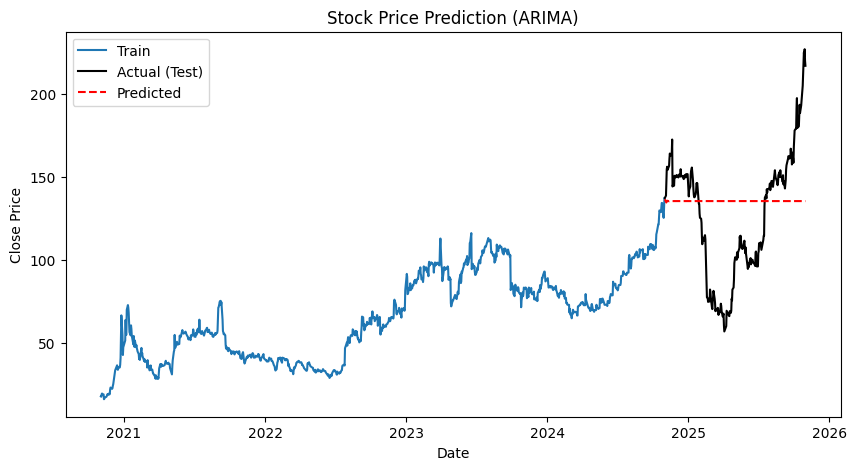

Text(0.5, 1.0, 'Stock Price Prediction (ARIMA)')

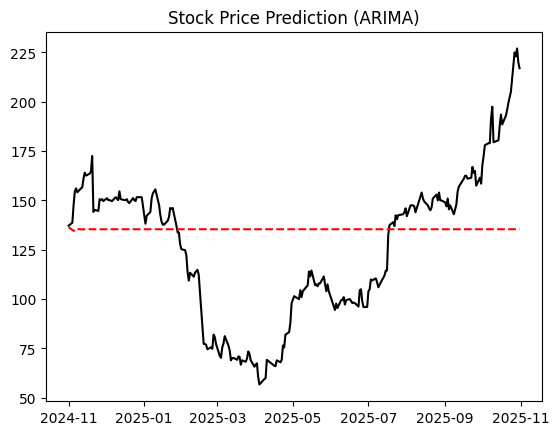

In [9]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Actual (Test)', color='black')
plt.plot(test.index, test['Predicted'], label='Predicted', color='red', linestyle='--')
plt.title('Stock Price Prediction (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
plt.plot(test.index, test['Close'], label='Actual (Test)', color='black')
plt.plot(test.index, test['Predicted'], label='Predicted', color='red', linestyle='--')
plt.title('Stock Price Prediction (ARIMA)')

# Forecast 30 Days

In [10]:
model = ARIMA(df['Close'], order=(5,1,0))
model_fit = model.fit()

c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='D')[1:]
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

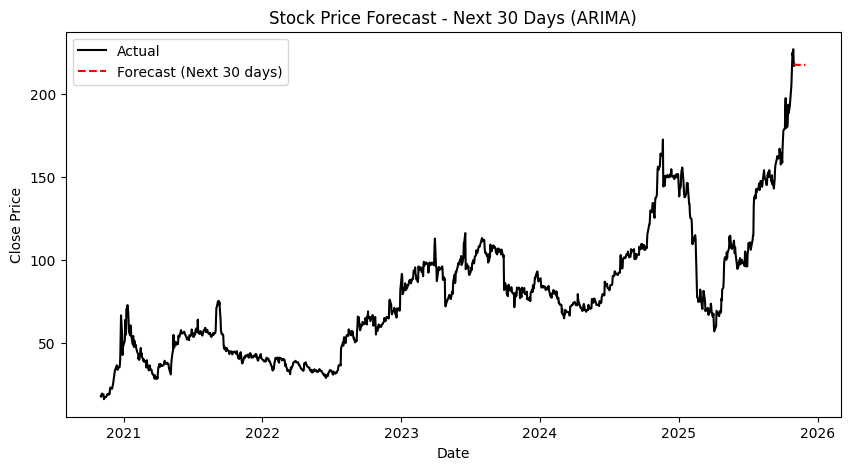

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label='Actual', color='black')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast (Next 30 days)', color='red', linestyle='--')

plt.title('Stock Price Forecast - Next 30 Days (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Zoom the predicted line

In [1]:
plt.figure(figsize=(10,5))
plt.plot(df.index[-180:], df['Close'].iloc[-180:], label='Actual (Last 6 months)', color='black')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast (Next 30 days)', color='red', linestyle='--')
plt.title('Zoomed Forecast - Next 30 Days (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [14]:
print(forecast_df.head())

              Forecast
Date                  
2025-11-01  217.147600
2025-11-02  217.959825
2025-11-03  217.890173
2025-11-04  217.573474
2025-11-05  217.467508


## Range

c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\BOUY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


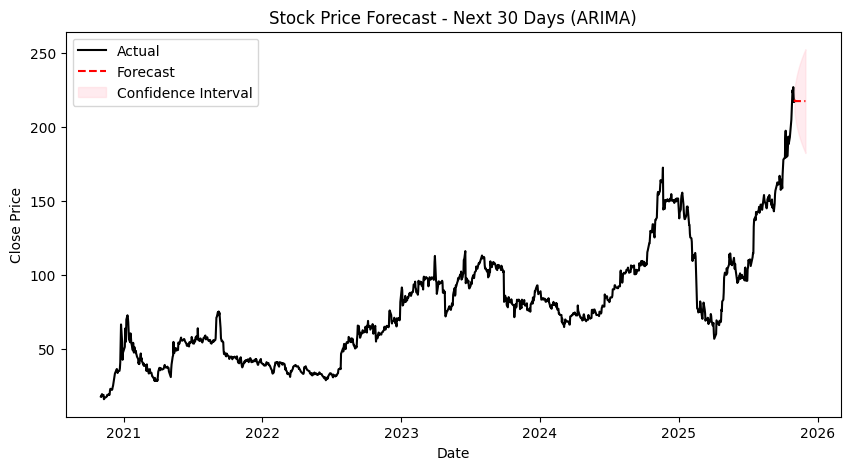

In [16]:
df.index = pd.to_datetime(df.index)


last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')


forecast_res = model_fit.get_forecast(steps=30)
forecast_mean = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

forecast_mean.index = future_dates
conf_int.index = future_dates

plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label='Actual', color='black')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red', linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1],
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Stock Price Forecast - Next 30 Days (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Summary

In [20]:
mean_price = forecast_mean.mean()
min_price = conf_int.iloc[:, 0].min()
max_price = conf_int.iloc[:, 1].max()

print("📈 Summary Predict 30 Days")
print(f"Average Price Predict: {mean_price:.2f}")
print(f"Min Price Predict: {min_price:.2f}")
print(f"Max Price Predict: {max_price:.2f}")

📈 Summary Predict 30 Days
Average Price Predict: 217.55
Min Price Predict: 182.45
Max Price Predict: 252.63
